In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [74]:

url = 'https://raw.githubusercontent.com/Yairvedaniel/project1/main/googleplaystore_%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%20%D7%A2%D7%95%D7%92%D7%9F%20%D7%95%D7%93%D7%A0%D7%99%D7%90%D7%9C.csv'
apps = pd.read_csv(url, encoding='utf-8')

apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [77]:
apps.shape


(10841, 14)

In [78]:
apps.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
Unnamed: 0           0
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [72]:
 - צריך לבדוק משמעות של -כמו שניתן לראות - קיימים ערכים חסרים

SyntaxError: invalid syntax (1273865250.py, line 1)

In [ ]:
ניתוח פופולריות לפי קטגוריות:

חקור את מספר ההתקנות הממוצע והכולל עבור כל קטגוריה.
נתח את דירוגי המשתמשים לפי קטגוריות ובדוק אם יש קטגוריות עם דירוגים גבוהים יותר או נמוכים יותר מהממוצע.
צור גרפים המראים את ההבדלים בפופולריות בין קטגוריות שונות.

  free_non  Count
0     Free  10040
1     Paid    801


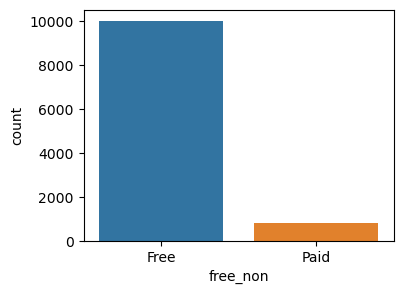

In [79]:
apps['Price'] = apps['Price'].astype(str)

apps['free_non'] = apps['Price'].apply(lambda x: 'Paid' if x != '0' else 'Free')

price_ft = apps.groupby(['free_non']).size().reset_index(name='Count')

price_ft = apps.groupby(['free_non']).size().sort_values(ascending=False).reset_index(name='Count')

plt.figure(figsize=(4, 3))
sns.countplot(x='free_non', data=apps)

print(price_ft)

In [83]:
# הסר ערכים לא חוקיים בעמודת ההתקנות והמר לערכים מספריים
apps = apps[apps['Installs'] != 'Free']
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# חישוב מספר ההתקנות הממוצע והכולל עבור כל קטגוריה
installs_per_category = apps.groupby('Category')['Installs'].agg(['mean', 'sum']).reset_index()
installs_per_category.columns = ['Category', 'Average Installs', 'Total Installs']

# הצגת התוצאות
print(installs_per_category)


               Category  Average Installs  Total Installs
0        ART_AND_DESIGN      1.912894e+06       124338100
1     AUTO_AND_VEHICLES      6.250613e+05        53130211
2                BEAUTY      5.131519e+05        27197050
3   BOOKS_AND_REFERENCE      8.318050e+06      1921469576
4              BUSINESS      2.178076e+06      1001914865
5                COMICS      9.347692e+05        56086150
6         COMMUNICATION      8.435989e+07     32647276251
7                DATING      1.129533e+06       264310807
8             EDUCATION      5.586231e+06       871452000
9         ENTERTAINMENT      1.925611e+07      2869160000
10               EVENTS      2.495806e+05        15973161
11               FAMILY      5.201959e+06     10258263505
12              FINANCE      2.395215e+06       876648734
13       FOOD_AND_DRINK      2.156683e+06       273898751
14                 GAME      3.066960e+07     35086024415
15   HEALTH_AND_FITNESS      4.642441e+06      1583072512
16       HOUSE

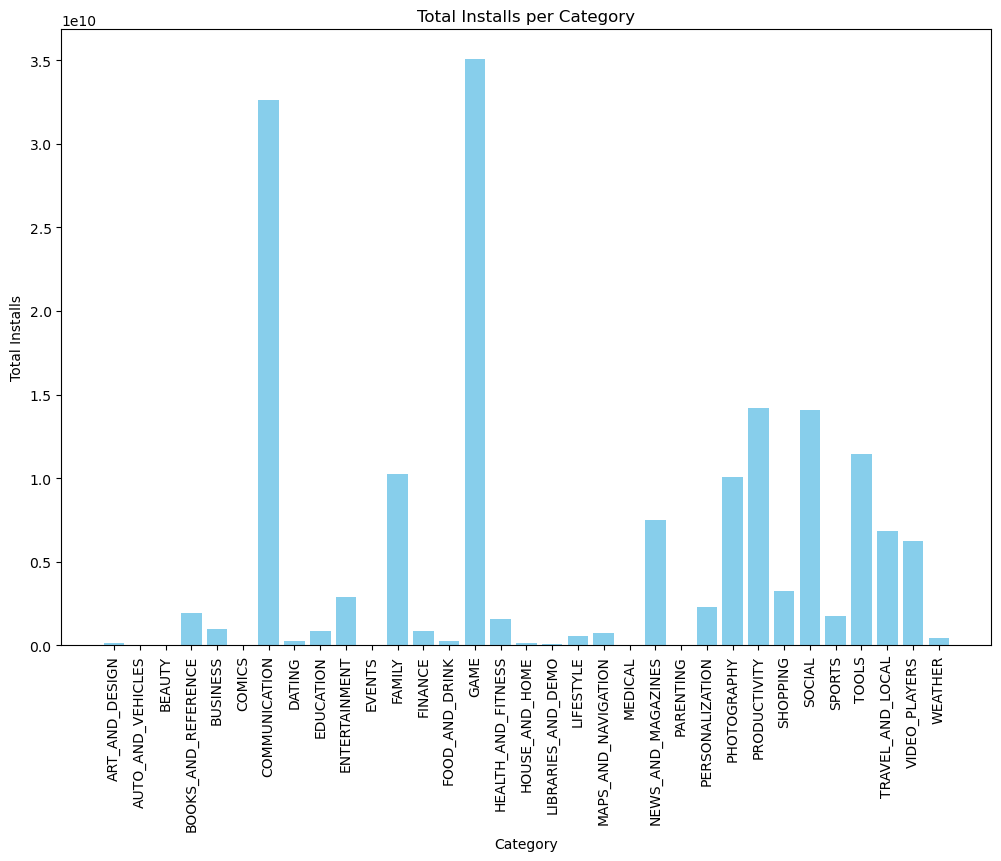

NameError: name 'ratings_per_category' is not defined

<Figure size 1200x800 with 0 Axes>

In [84]:
# גרף של מספר ההתקנות הכולל עבור כל קטגוריה
plt.figure(figsize=(12, 8))
plt.bar(installs_per_category['Category'], installs_per_category['Total Installs'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Total Installs per Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

# גרף של דירוגים ממוצעים עבור כל קטגוריה
plt.figure(figsize=(12, 8))
plt.bar(ratings_per_category['Category'], ratings_per_category['Average Rating'], color='lightgreen')
plt.axhline(overall_average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Overall Average Rating: {overall_average_rating:.2f}')
plt.xticks(rotation=90)
plt.title('Average Ratings per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.legend()
plt.show()
